In [31]:
#IMPORTS

import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.multitest import fdrcorrection


In [14]:
full_analysis_df = pd.read_excel('c:/Users/Hailey Sherman/ClimateOfHopeData/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_w_SASSY_urban_rural.xlsx')
emotions_mean_by_ida = pd.read_excel('c:/Users/Hailey Sherman/ClimateOfHopeData/Data_2025/emotion_means_by_id.xlsx')
#full_analysis_df = pd.read_excel('c:/Users/u1172791/COH files/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_w_SASSY_urban_rural.xlsx')
#emotions_mean_by_ida = pd.read_excel('c:/Users/u1172791/COH files/Data_2025/emotion_means_by_id.xlsx')
display(emotions_mean_by_ida)

,ida,afraid_scared,angry_frustrated,anxious,guilty,happy,hopeless,indifferent,inspired,interested,numb,optimistic_hopeful,sad,stressed
0,24012401BF,1.00,0.75,1.00,0.50,0.75,0.25,0.25,1.00,1.50,0.00,1.25,0.75,0.75
1,24012401MG,0.00,0.25,0.25,0.00,0.50,0.25,0.25,0.75,2.25,0.50,1.75,0.50,0.00
2,24012401PM,0.75,1.25,1.00,1.00,1.00,0.25,0.50,1.50,2.00,0.00,2.00,1.00,1.00
3,24012601LS,0.75,1.00,0.00,0.75,1.00,0.50,0.00,1.00,2.00,1.00,2.50,1.00,1.00
4,24012601RS,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.50,0.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,24040610EC,0.00,0.00,0.25,0.00,1.50,0.00,0.50,1.00,2.25,0.00,1.75,0.25,0.50
180,24040610MC,1.00,0.75,0.50,0.00,0.50,1.00,0.75,0.25,1.50,0.00,1.00,1.00,0.50
181,24040610OW,1.50,1.25,1.25,1.00,0.75,1.50,0.50,0.75,2.25,1.00,1.00,1.25,1.00
182,24040611KS,1.25,1.50,0.50,0.25,1.50,1.50,0.25,1.50,2.50,0.25,1.50,1.00,0.25


In [15]:
# Test normality and homogeneity of variance for each emotion

# get emotion columns
emotion_cols = [col for col in emotions_mean_by_ida.columns if col != 'ida']

# Shapiro-Wilk test for normality
print("\nShapiro-Wilk Normality Test Results:")
print("-" * 50)
normality_results = []
for emotion in emotion_cols:
    stat, p_value = stats.shapiro(emotions_mean_by_ida[emotion])
    normality_results.append({
        'emotion': emotion,
        'statistic': stat,
        'p_value': p_value,
        'normal': p_value > 0.05
    })
    
normality_df = pd.DataFrame(normality_results)
display(normality_df)

# Levene's test for homogeneity of variance
print("\nLevene's Test Results:")
print("-" * 50)
levene_results = []

# For Levene's test, we'll compare variances between all emotion columns
for i, emotion1 in enumerate(emotion_cols):
    for emotion2 in emotion_cols[i+1:]:
        stat, p_value = stats.levene(emotions_mean_by_ida[emotion1], 
                                   emotions_mean_by_ida[emotion2])
        levene_results.append({
            'emotion_pair': f"{emotion1} vs {emotion2}",
            'statistic': stat,
            'p_value': p_value,
            'equal_variance': p_value > 0.05
        })

levene_df = pd.DataFrame(levene_results)
display(levene_df)



Shapiro-Wilk Normality Test Results:
--------------------------------------------------


,emotion,statistic,p_value,normal
0,afraid_scared,0.890655,2.321193e-10,False
1,angry_frustrated,0.906893,2.280893e-09,False
2,anxious,0.919251,1.545992e-08,False
3,guilty,0.852547,2.326560e-12,False
4,happy,0.965439,1.641860e-04,False
5,hopeless,0.897605,5.998650e-10,False
6,indifferent,0.866648,1.150803e-11,False
7,inspired,0.972996,1.236958e-03,False
8,interested,0.940360,6.429837e-07,False
9,numb,0.718963,2.359322e-17,False



Levene's Test Results:
--------------------------------------------------


,emotion_pair,statistic,p_value,equal_variance
0,afraid_scared vs angry_frustrated,1.066515,0.302416,True
1,afraid_scared vs anxious,1.546899,0.214390,True
2,afraid_scared vs guilty,0.113111,0.736822,True
3,afraid_scared vs happy,4.382248,0.037003,False
4,afraid_scared vs hopeless,0.041820,0.838077,True
...,...,...,...,...
73,numb vs sad,6.925947,0.008855,False
74,numb vs stressed,10.997490,0.001004,False
75,optimistic_hopeful vs sad,1.477167,0.225002,True
76,optimistic_hopeful vs stressed,0.027374,0.868681,True


In [16]:
# Run both Pearson and Spearman correlations to compare age and average emotions

#merge age into same dataframe
emotions_with_age = emotions_mean_by_ida.merge(
    full_analysis_df[['ida', 'age']], 
    on='ida', 
    how='left'
)

#loop through all emotions and run correlation
results = []
for emotion in emotion_cols:
    pearson = stats.pearsonr(emotions_with_age['age'], emotions_with_age[emotion])
    spearman = stats.spearmanr(emotions_with_age['age'], emotions_with_age[emotion])

    results.append({
        'emotion': emotion,
        'pearson_r': pearson[0],
        'pearson_p': pearson[1],
        'spearman_r': spearman[0],
        'spearman_p': spearman[1]
    })

results_df = pd.DataFrame(results)
display(results_df)   

,emotion,pearson_r,pearson_p,spearman_r,spearman_p
0,afraid_scared,NaN,NaN,NaN,NaN
1,angry_frustrated,NaN,NaN,NaN,NaN
2,anxious,NaN,NaN,NaN,NaN
3,guilty,NaN,NaN,NaN,NaN
4,happy,NaN,NaN,NaN,NaN
5,hopeless,NaN,NaN,NaN,NaN
6,indifferent,NaN,NaN,NaN,NaN
7,inspired,NaN,NaN,NaN,NaN
8,interested,NaN,NaN,NaN,NaN
9,numb,NaN,NaN,NaN,NaN


In [17]:
# Mann-Whitney U test to compare emotions between genders
# ****** No significant results *****
print("\nMann-Whitney U Test Results for Gender Differences:")
print("-" * 50)

mw_results = []
for emotion in emotion_cols:
    # Get emotion scores for each gender
    male_scores = emotions_mean_by_ida[emotion][full_analysis_df['gender'] == 'Male']
    female_scores = emotions_mean_by_ida[emotion][full_analysis_df['gender'] == 'Female']
    
    # Perform Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(male_scores, female_scores, alternative='two-sided')
    
    mw_results.append({
        'emotion': emotion,
        'statistic': stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

mw_results_df = pd.DataFrame(mw_results)
display(mw_results_df)



Mann-Whitney U Test Results for Gender Differences:
--------------------------------------------------


,emotion,statistic,p_value,significant
0,afraid_scared,4638.5,0.086955,False
1,angry_frustrated,4694.5,0.060536,False
2,anxious,4341.0,0.397472,False
3,guilty,3922.5,0.713011,False
4,happy,4050.5,0.995402,False
5,hopeless,4738.5,0.045168,True
6,indifferent,4687.5,0.062777,False
7,inspired,4038.0,0.978220,False
8,interested,4414.0,0.290770,False
9,numb,4165.5,0.716153,False


In [18]:
#merge SASSY into dataframe
emotions_mean_by_ida = pd.merge(emotions_mean_by_ida, full_analysis_df[['ida', 'SASSY']], on='ida')

In [22]:
#set SASSY order
emotions_mean_by_ida['SASSY'] = pd.Categorical(
        emotions_mean_by_ida['SASSY'],
        categories=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
        ordered=True
)

In [28]:
# Run spearman test on sassy vs average emots
spearman_results = []
for emotion in emotion_cols:

    # Drop any rows with missing values
    data_subset = emotions_mean_by_ida[[emotion, 'SASSY']].dropna()
    data_subset['SASSY'] = data_subset['SASSY'].cat.codes

    # Perform Spearman rank correlation test
    spearman_corr, spearman_p = stats.spearmanr(data_subset['SASSY'], data_subset[emotion])
    
    spearman_results.append({
        'emotion': emotion,
        'spearman_corr': spearman_corr,
        'spearman_p': round(spearman_p, 6),  # Round to 6 decimal places
        'significant': spearman_p < 0.05
    })

# Create DataFrame and sort by p-value (ascending)
spearman_results_df = pd.DataFrame(spearman_results)
spearman_results_df = spearman_results_df.sort_values(by='spearman_p')
display(spearman_results_df)

,emotion,spearman_corr,spearman_p,significant
1,angry_frustrated,0.412698,0.000000,True
5,hopeless,0.394758,0.000000,True
11,sad,0.424879,0.000000,True
12,stressed,0.356798,0.000002,True
2,anxious,0.341163,0.000007,True
0,afraid_scared,0.334202,0.000011,True
3,guilty,0.333385,0.000011,True
9,numb,0.252948,0.001009,True
8,interested,0.184005,0.017638,True
10,optimistic_hopeful,0.110971,0.154634,False


In [32]:
# Get p-values in the sorted order
p_values = spearman_results_df['spearman_p'].values

# Apply FDR correction
rejected, corrected_p_values = fdrcorrection(p_values, alpha=0.05, method='indep')

# Add corrected p-values to the dataframe
spearman_results_df['corrected_p'] = [round(p, 6) for p in corrected_p_values]
spearman_results_df['significant_fdr'] = rejected

# Display results
display(spearman_results_df)

,emotion,spearman_corr,spearman_p,significant,corrected_p,significant_fdr
1,angry_frustrated,0.412698,0.000000,True,0.000000,True
5,hopeless,0.394758,0.000000,True,0.000000,True
11,sad,0.424879,0.000000,True,0.000000,True
12,stressed,0.356798,0.000002,True,0.000006,True
2,anxious,0.341163,0.000007,True,0.000018,True
0,afraid_scared,0.334202,0.000011,True,0.000020,True
3,guilty,0.333385,0.000011,True,0.000020,True
9,numb,0.252948,0.001009,True,0.001640,True
8,interested,0.184005,0.017638,True,0.025477,True
10,optimistic_hopeful,0.110971,0.154634,False,0.191294,False


C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15620\4172601933.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y='sad', data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15620\4172601933.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')['sad'].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])


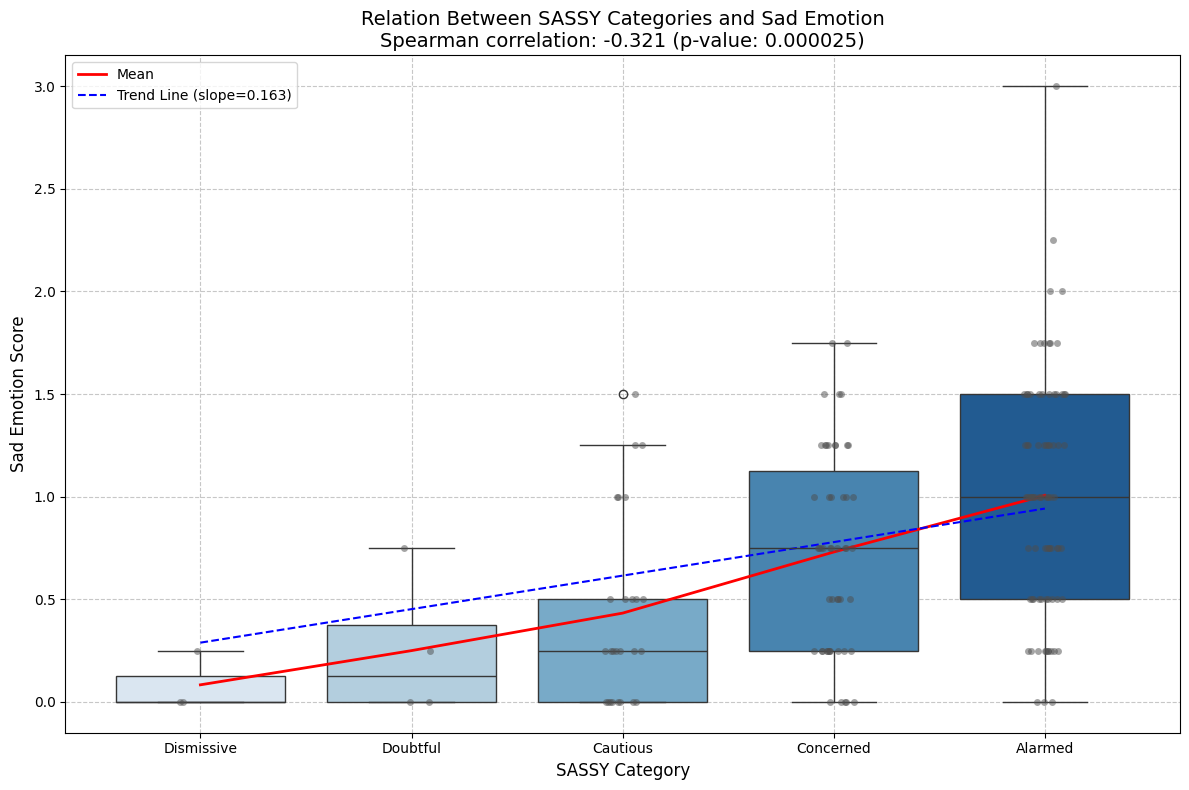

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15620\4172601933.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SASSY', y='sad', data=emotions_mean_by_ida,


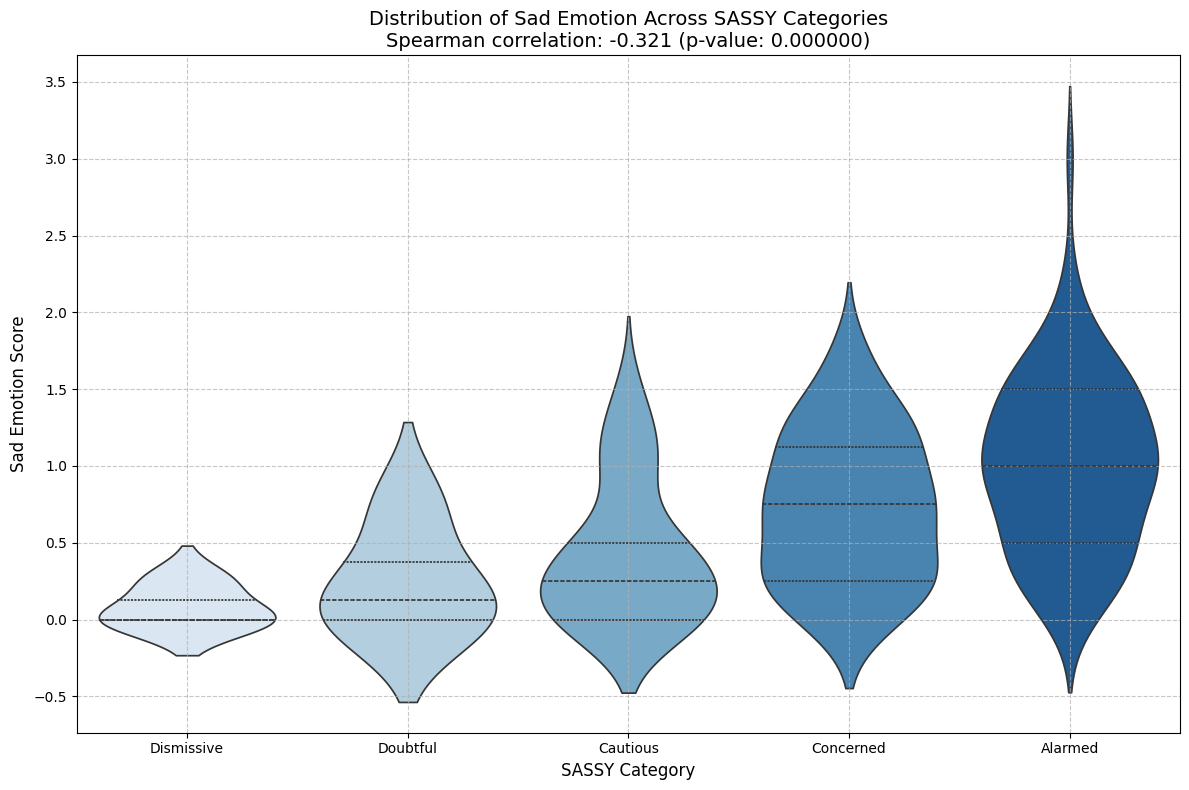

In [23]:
#plot emotion vs Sassy

# Setup the figure with a larger size for better visibility
plt.figure(figsize=(12, 8))

# Create a box plot to show distribution of 'sad' across SASSY categories
ax = sns.boxplot(x='SASSY', y='sad', data=emotions_mean_by_ida, 
                 order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
                 palette='Blues')

# Add individual data points for more detail (jittered to avoid overlap)
sns.stripplot(x='SASSY', y='sad', data=emotions_mean_by_ida,
              order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
              jitter=True, size=5, color='0.3', alpha=0.5)

# Calculate the mean for each category to add a line connecting them
means = emotions_mean_by_ida.groupby('SASSY')['sad'].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
x_positions = range(len(means))
plt.plot(x_positions, means.values, 'r-', linewidth=2, label='Mean')

# Add correlation information to the plot
corr_value = -0.321  # From your results
p_value = 0.000025   # From your results

# Add a title with correlation information
plt.title(f'Relation Between SASSY Categories and Sad Emotion\nSpearman correlation: {corr_value:.3f} (p-value: {p_value:.6f})', 
          fontsize=14)

# Label the axes
plt.xlabel('SASSY Category', fontsize=12)
plt.ylabel('Sad Emotion Score', fontsize=12)

# Add a trend line (regression line)
# Get numeric codes for categories (0, 1, 2, 3, 4)
numeric_sassy = emotions_mean_by_ida['SASSY'].cat.codes
slope, intercept, r_value, p_value, std_err = stats.linregress(numeric_sassy, emotions_mean_by_ida['sad'])
x_line = np.array([0, 1, 2, 3, 4])
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, 'b--', label=f'Trend Line (slope={slope:.3f})')

# Add a legend
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

# Alternative: If you want a violin plot to see distribution better
plt.figure(figsize=(12, 8))
sns.violinplot(x='SASSY', y='sad', data=emotions_mean_by_ida,
               order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
               palette='Blues', inner='quartile')
plt.title(f'Distribution of Sad Emotion Across SASSY Categories\nSpearman correlation: {corr_value:.3f} (p-value: {p_value:.6f})', 
          fontsize=14)
plt.xlabel('SASSY Category', fontsize=12)
plt.ylabel('Sad Emotion Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()